In [56]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns 

import numpy as np

In [19]:
df.tail()

,Order_ID,Order_Date,Customer_ID,Customer_Name,Address,City,State,ZIP/Postal Code,Country/Region,Salesperson,...,Ship_City,ShipZIP/PostalCode,Ship_Country/Region,Payment_Type,Product_Name,Category,Unit_Price,Quantity,Revenue,Shipping_Fee
364,1428,2014-12-29,29,Company CC,789 29th Street,Denver,CO,99999,USA,Jan Kotas,...,Denver,99999,USA,Check,Fruit Cocktail,Fruit & Veg,39.00,54.0,2106.00,214.81200
365,1429,2014-12-06,6,Company F,123 6th Street,Milwaukee,WI,99999,USA,Michael Neipper,...,Milwaukee,99999,USA,Check,Dried Pears,Dried Fruit & Nuts,30.00,33.0,990.00,95.04000
366,1430,2014-12-06,6,Company F,123 6th Street,Milwaukee,WI,99999,USA,Michael Neipper,...,Milwaukee,99999,USA,Check,Dried Apples,Dried Fruit & Nuts,53.00,34.0,1802.00,185.60600
367,1431,2014-12-04,4,Company D,123 4th Street,New York,NY,99999,USA,Andrew Cencini,...,New York,99999,USA,Check,Gnocchi,Pasta,38.00,59.0,2242.00,226.44200
368,1432,2014-12-03,3,Company C,123 3rd Street,Los Angelas,CA,99999,USA,Mariya Sergienko,...,Los Angelas,99999,USA,Check,Green Tea,Beverages,2.99,24.0,71.76,7.10424


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_ID             369 non-null    int64         
 1   Order_Date           369 non-null    datetime64[ns]
 2   Customer_ID          369 non-null    int64         
 3   Customer_Name        369 non-null    object        
 4   Address              369 non-null    object        
 5   City                 369 non-null    object        
 6   State                369 non-null    object        
 7   ZIP/Postal Code      369 non-null    int64         
 8   Country/Region       369 non-null    object        
 9   Salesperson          369 non-null    object        
 10  Region               369 non-null    object        
 11  Ship_Name            369 non-null    object        
 12  Ship_Address         369 non-null    object        
 13  Ship_City            369 non-null  

In [8]:
df.describe()

,Order_ID,Customer_ID,ZIP/Postal Code,ShipZIP/PostalCode,Unit_Price,Quantity,Revenue,Shipping_Fee
count,369.000000,369.000000,369.0,369.0,366.000000,366.000000,369.000000,369.000000
mean,1212.151762,11.934959,99999.0,99999.0,21.425628,56.262295,1178.959783,118.328177
std,126.400067,9.352755,0.0,0.0,16.891737,26.729329,1164.676660,116.471099
min,1001.000000,1.000000,99999.0,99999.0,2.990000,10.000000,0.000000,3.734500
25%,1102.000000,6.000000,99999.0,99999.0,9.650000,33.250000,368.000000,38.016000
50%,1216.000000,9.000000,99999.0,99999.0,14.000000,55.000000,848.000000,85.470000
75%,1324.000000,25.000000,99999.0,99999.0,34.800000,80.000000,1458.000000,144.035200
max,1432.000000,29.000000,99999.0,99999.0,81.000000,100.000000,7938.000000,769.986000


In [10]:
df.shape

(369, 23)

<AxesSubplot:title={'center':'Sales by Rep'}, xlabel='Salesperson', ylabel='Revenue'>

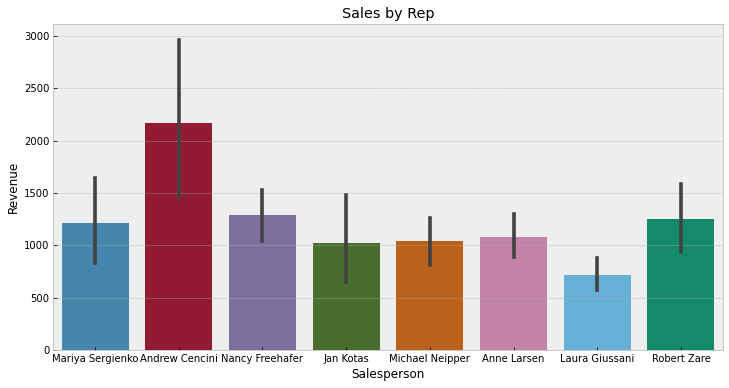

In [28]:
plt.style.use('bmh')
plt.figure(figsize = (12,6))
plt.title('Sales by Rep')
sns.barplot(x = 'Salesperson', y= 'Revenue', data =df )

In [32]:
df['Customer_Name'].value_counts()

Company J     45
Company H     41
Company F     36
Company A     33
Company BB    32
Company D     31
Company Z     30
Company I     26
Company C     25
Company K     25
Company CC    16
Company Y     12
Company G      7
Company L      6
Company AA     4
Name: Customer_Name, dtype: int64

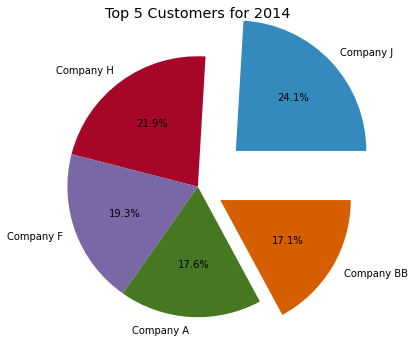

In [34]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
slices=[45,41,36,33,32]
explode= [0.4,0,0,0,0.2]
labels=['Company J','Company H','Company F','Company A','Company BB']
plt.pie(slices, labels=labels,explode=explode,autopct='%1.1f%%')
plt.title('Top 5 Customers for 2014')

plt.show()

In [36]:
df['Region'].value_counts()

North    117
East      88
South     87
West      77
Name: Region, dtype: int64

In [37]:
region_df = pd.DataFrame(df['Region'].value_counts()) 

In [38]:
region_df 

,Region
North,117
East,88
South,87
West,77


<AxesSubplot:ylabel='Region'>

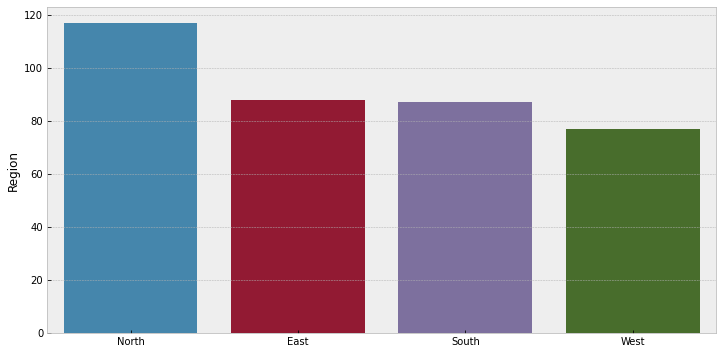

In [40]:
plt.figure(figsize = (12,6))
sns.barplot(x =region_df.index , y = region_df['Region'])

In [41]:
payment_df = pd.DataFrame(df['Payment_Type'].value_counts())
payment_df

,Payment_Type
Credit Card,162
Check,134
Cash,73


<AxesSubplot:ylabel='Payment_Type'>

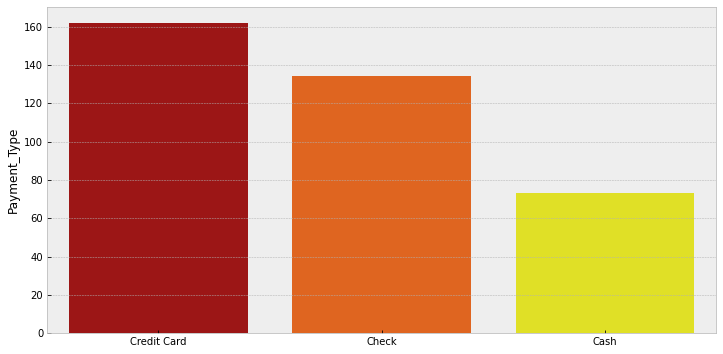

In [45]:
plt.figure(figsize = (12,6))
sns.barplot(x =payment_df.index , y = payment_df['Payment_Type'], palette = 'hot')

In [50]:
df['Order_Date'].min()



Timestamp('2014-01-01 00:00:00')

In [51]:
df['Order_Date'].max()

Timestamp('2014-12-29 00:00:00')

In [54]:
df['month_year'] = df ['Order_Date'].apply(lambda x: x.strftime('%y-%m'))

In [55]:
df.groupby('month_year').sum()

,Order_ID,Customer_ID,ZIP/Postal Code,ShipZIP/PostalCode,Unit_Price,Quantity,Revenue,Shipping_Fee
month_year,,,,,,,,
14-01,29435,328,2899971,2899971,582.57,1713.0,32907.84,3265.51293
14-02,20807,209,1999980,1999980,414.04,851.0,19955.50,2102.40530
14-03,23400,289,2199978,2199978,533.35,1251.0,30852.60,3133.40105
14-04,19611,184,1799982,1799982,336.73,1118.0,20771.79,2106.12766
14-05,36807,402,3299967,3299967,704.32,1702.0,34307.05,3453.22205
14-06,48788,500,4199958,4199958,943.22,2523.0,55601.61,5525.32046
14-07,31280,332,2599974,2599974,547.79,1309.0,27318.54,2719.93306
14-08,33347,350,2699973,2699973,557.12,1547.0,29921.46,3005.04304
14-09,31569,301,2499975,2499975,497.18,1586.0,31949.97,3242.82301


In [58]:
df_trend =df.groupby('month_year').sum() ['Revenue'].reset_index()

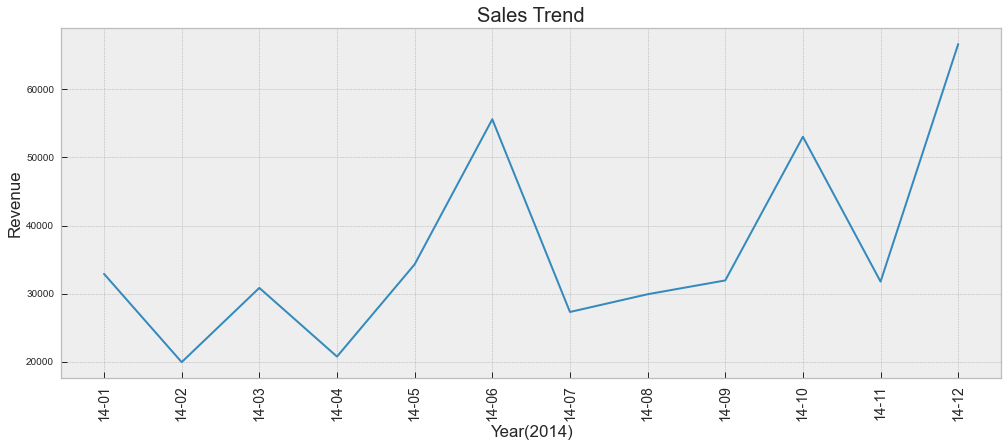

In [77]:
plt.style.use('bmh')
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'], df_trend['Revenue'] )
plt.xticks(rotation='vertical', size=14)
plt.xlabel('Year(2014)')
plt.ylabel('Revenue')
plt.title('Sales Trend')
plt.show()